In [0]:
! wget https://storage.googleapis.com/capstone-dsi/TimelapseImages.zip -q

In [0]:
! unzip -qq /content/TimelapseImages.zip 

In [0]:
! rm -rf /content/__MACOSX/

In [0]:
from skimage import io
import matplotlib.pyplot as plt

In [7]:
img = io.imread('/content/TimelapseImages/7-9_AM_Serial/7-9_AM_P1C1_Serial.jpg')
img2 = io.imread('/content/TimelapseImages/7-12_PM_Serial/7-12_PM_P1C1_Serial.jpg')

print(img.shape)

(4000, 3200, 3)


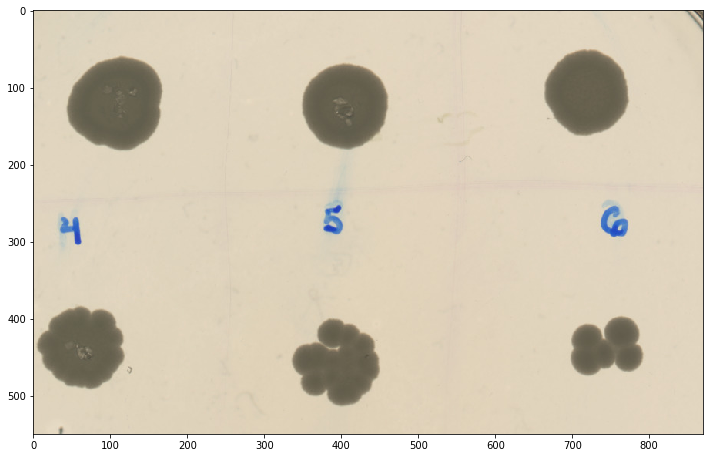

In [8]:
plt.figure(figsize=(12,15))
plt.imshow(img[1700:2250, 1180:2050])

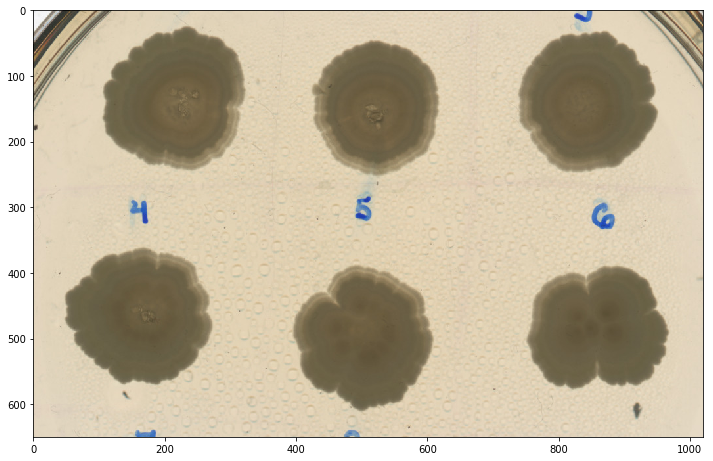

In [9]:
plt.figure(figsize=(12,15))
plt.imshow(img2[1600:2250, 1180:2200])

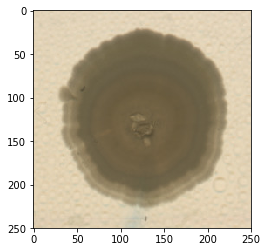

In [19]:
patch = img2[1625:1875, 1575:1825]
plt.imshow(patch)

In [0]:
# convert image to grayscale
# https://scikit-image.org/docs/dev/auto_examples/color_exposure/plot_rgb_to_gray.html


from skimage.color import rgb2gray

image  = rgb2gray(patch)

In [0]:
# thresholding the image to get the patch
# https://scikit-image.org/docs/dev/auto_examples/segmentation/plot_thresholding.html
  
from skimage.filters import threshold_otsu

thresh = threshold_otsu(image)
binary = image > thresh

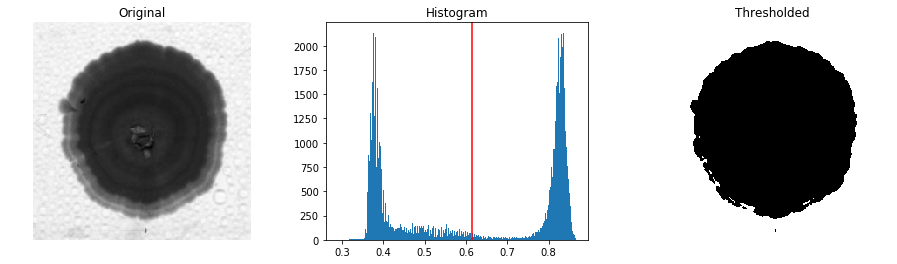

In [32]:
fig, axes = plt.subplots(ncols=3, figsize=(16, 4))
ax = axes.ravel()
ax[0] = plt.subplot(1, 3, 1)
ax[1] = plt.subplot(1, 3, 2)
ax[2] = plt.subplot(1, 3, 3, sharex=ax[0], sharey=ax[0])

ax[0].imshow(image, cmap=plt.cm.gray)
ax[0].set_title('Original')
ax[0].axis('off')

ax[1].hist(image.ravel(), bins=256)
ax[1].set_title('Histogram')
ax[1].axvline(thresh, color='r')

ax[2].imshow(binary, cmap=plt.cm.gray)
ax[2].set_title('Thresholded')
ax[2].axis('off')

plt.savefig('out/histogram-masking.jpg')

In [0]:
# execute once
# ! mkdir out

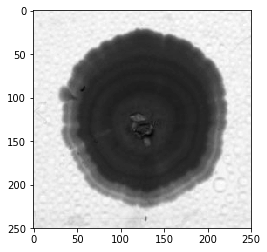

In [27]:
plt.imshow(image, cmap=plt.cm.gray)
plt.savefig('out/mask-patch.jpg')

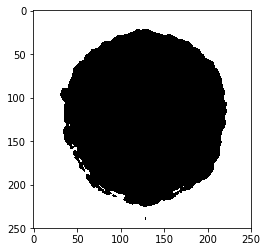

In [28]:
plt.imshow(binary, cmap=plt.cm.gray)
plt.savefig('out/mask-sample.jpg')

In [0]:
image3_path = "/content/TimelapseImages/7-9_PM_Control/7-9_PM_P1C10_Control.jpg"
img3 = io.imread(image3_path)

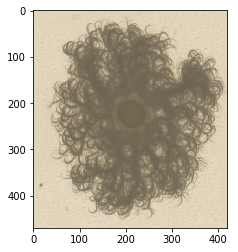

In [44]:
plt.imshow(img3[1850:2320, 1530:1950])

In [0]:
def thresholding(color_image):
  image  = rgb2gray(color_image)
  
  thresh = threshold_otsu(image)
  binary = image > thresh
  
  fig, axes = plt.subplots(ncols=3, figsize=(16, 4))
  ax = axes.ravel()
  ax[0] = plt.subplot(1, 3, 1)
  ax[1] = plt.subplot(1, 3, 2)
  ax[2] = plt.subplot(1, 3, 3, sharex=ax[0], sharey=ax[0])

  ax[0].imshow(image, cmap=plt.cm.gray)
  ax[0].set_title('Original')
  ax[0].axis('off')

  ax[1].hist(image.ravel(), bins=256)
  ax[1].set_title('Histogram')
  ax[1].axvline(thresh, color='r')

  ax[2].imshow(binary, cmap=plt.cm.gray)
  ax[2].set_title('Thresholded')
  ax[2].axis('off')

  plt.savefig('out/histogram-masking-2.jpg')

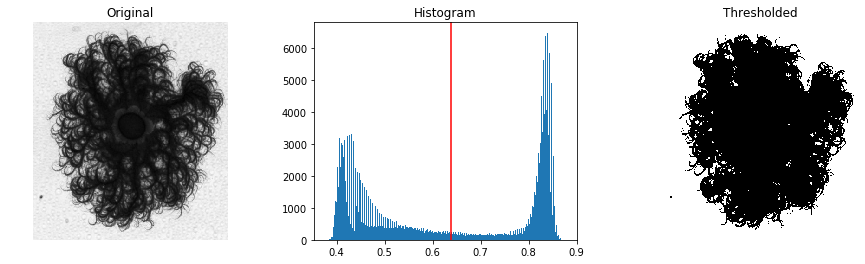

In [47]:
thresholding(img3[1850:2320, 1530:1950])